# Ejercicio: Análisis y Modelado de la Calidad de Bananas

En este ejercicio se utilizará el dataset `banana_quality.csv` para realizar un análisis completo y desarrollar un modelo de clasificación (Regresión Logística) que permita predecir la calidad de las bananas (Good vs Bad). El ejercicio se divide en los siguientes pasos:

## Paso 1: Descargar el Dataset

Utiliza el siguiente enlace para descargar el dataset:

https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/main/banana_quality.csv

In [1]:
!wget https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/main/banana_quality.csv

--2025-03-26 22:06:17--  https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/main/banana_quality.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 630007 (615K) [text/plain]
Saving to: ‘banana_quality.csv’

banana_quality.csv  100%[===================>] 615.24K  --.-KB/s    in 0.07s   

2025-03-26 22:06:17 (8.61 MB/s) - ‘banana_quality.csv’ saved [630007/630007]



## Paso 2: Cargar el Dataset

Importa las librerías necesarias y carga el dataset en un DataFrame de Pandas.

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
# Cargar el dataset
df = pd.read_csv('banana_quality.csv')

# Visualizar las primeras filas
print('Primeras filas del dataset:')
display(df.head())

Primeras filas del dataset:


,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
0,-1.924968,0.468078,3.077832,-1.472177,0.294799,2.435570,0.271290,Good
1,-2.409751,0.486870,0.346921,-2.495099,-0.892213,2.067549,0.307325,Good
2,-0.357607,1.483176,1.568452,-2.645145,-0.647267,3.090643,1.427322,Good
3,-0.868524,1.566201,1.889605,-1.273761,-1.006278,1.873001,0.477862,Good
4,0.651825,1.319199,-0.022459,-1.209709,-1.430692,1.078345,2.812442,Good


## Paso 3: Exploración Inicial

Revisa la información general del DataFrame y genera un resumen estadístico. Identifica la estructura y si existen valores nulos.

In [3]:
import pandas as pd
df = pd.read_csv('banana_quality.csv')
print("Información del DataFrame:")
print(df.info())
print("\n")
print("Resumen estadístico:")
print(df.describe())
print("\n")
print("Valores nulos por columna:")
print(df.isnull().sum())


Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         8000 non-null   float64
 1   Weight       8000 non-null   float64
 2   Sweetness    8000 non-null   float64
 3   Softness     8000 non-null   float64
 4   HarvestTime  8000 non-null   float64
 5   Ripeness     8000 non-null   float64
 6   Acidity      8000 non-null   float64
 7   Quality      8000 non-null   object 
dtypes: float64(7), object(1)
memory usage: 500.1+ KB
None


Resumen estadístico:
              Size       Weight    Sweetness     Softness  HarvestTime  \
count  8000.000000  8000.000000  8000.000000  8000.000000  8000.000000   
mean     -0.747802    -0.761019    -0.770224    -0.014441    -0.751288   
std       2.136023     2.015934     1.948455     2.065216     1.996661   
min      -7.998074    -8.283002    -6.434022    -6.959320    -7.57000

## Paso 4: Análisis de la Variable Objetivo

Cuenta cuántas instancias hay de cada categoría en la variable **Quality**. Esto permitirá identificar si existen desbalances en la clase.

In [9]:
quality_counts = df['Quality'].value_counts()
print("\nConteo de instancias por categoría de Quality:")
quality_counts


Conteo de instancias por categoría de Quality:


,count
Quality,
Good,4006
Bad,3994


## Paso 5: Preprocesamiento de la Variable Objetivo

Convierte la variable **Quality** a formato numérico (por ejemplo, Good -> 1 y Bad -> 0) para poder utilizarla en el modelo.

In [10]:
df['Quality'] = df['Quality'].map({'Good': 1, 'Bad': 0})

## Paso 6: Selección de Variables (Features)

Define las variables independientes (X) y la variable dependiente (y). Usa todas las columnas numéricas o selecciona aquellas que consideres relevantes para predecir la calidad.

In [14]:
# Definir la variable dependiente 'y' (la calidad del plátano)
# The original code was looking for a column named 'quality_score' which was not in the dataframe.
# The code has been updated to look for the column 'Quality' instead.
y = df['Quality']

# Seleccionar las variables independientes 'X' (todas las columnas numéricas excepto 'Quality')
# Updating column to drop to 'Quality' to align with line 2
X = df.drop(columns=['Quality'])

# Opcional: Si quieres seleccionar solo las columnas numéricas específicas, puedes usar:
# X = df[['size', 'ripeness']]  # Esto selecciona solo 'size' y 'ripeness' como características

# Ver las primeras filas de X e y
print("Primeras filas de X (variables independientes):")
print(X.head())

print("\nPrimeras filas de y (variable dependiente):")
print(y.head())

Primeras filas de X (variables independientes):
       Size    Weight  Sweetness  Softness  HarvestTime  Ripeness   Acidity
0 -1.924968  0.468078   3.077832 -1.472177     0.294799  2.435570  0.271290
1 -2.409751  0.486870   0.346921 -2.495099    -0.892213  2.067549  0.307325
2 -0.357607  1.483176   1.568452 -2.645145    -0.647267  3.090643  1.427322
3 -0.868524  1.566201   1.889605 -1.273761    -1.006278  1.873001  0.477862
4  0.651825  1.319199  -0.022459 -1.209709    -1.430692  1.078345  2.812442

Primeras filas de y (variable dependiente):
0    1
1    1
2    1
3    1
4    1
Name: Quality, dtype: int64


## Paso 7: División en Conjuntos de Entrenamiento y Prueba

Separa el dataset en un conjunto de entrenamiento (70%) y otro de evaluación/prueba (30%). Asegúrate de estratificar para mantener el balance de clases.

In [15]:
from sklearn.model_selection import train_test_split

# Dividir el dataset en conjuntos de entrenamiento y prueba (70% entrenamiento, 30% prueba)
# Stratify asegura que se mantenga la proporción de clases en ambos conjuntos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Imprimir la forma de los conjuntos de entrenamiento y prueba
print("Forma del conjunto de entrenamiento (X_train):", X_train.shape)
print("Forma del conjunto de prueba (X_test):", X_test.shape)
print("Forma del conjunto de entrenamiento (y_train):", y_train.shape)
print("Forma del conjunto de prueba (y_test):", y_test.shape)


Forma del conjunto de entrenamiento (X_train): (5600, 7)
Forma del conjunto de prueba (X_test): (2400, 7)
Forma del conjunto de entrenamiento (y_train): (5600,)
Forma del conjunto de prueba (y_test): (2400,)


## Paso 8: Validación del Balanceo de Clases

Verifica que las clases estén balanceadas en los conjuntos de entrenamiento y prueba. Usa conteos y visualizaciones para comprobarlo.

Conteo de clases en el conjunto de entrenamiento:
Quality
1    2804
0    2796
Name: count, dtype: int64

Conteo de clases en el conjunto de prueba:
Quality
1    1202
0    1198
Name: count, dtype: int64


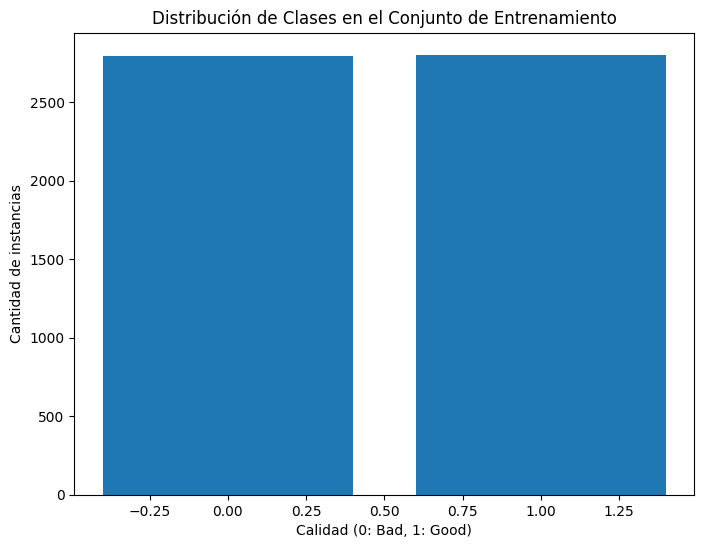

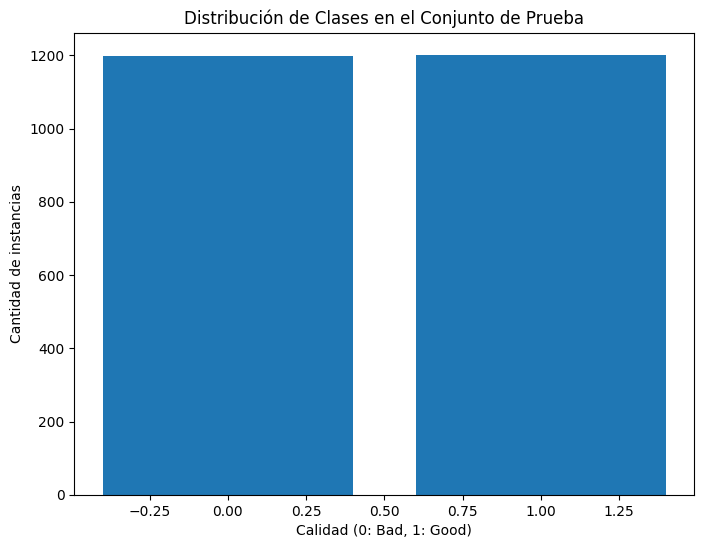

In [16]:
import matplotlib.pyplot as plt
# Contar la cantidad de instancias de cada clase en el conjunto de entrenamiento
train_class_counts = y_train.value_counts()
print("Conteo de clases en el conjunto de entrenamiento:")
print(train_class_counts)

# Contar la cantidad de instancias de cada clase en el conjunto de prueba
test_class_counts = y_test.value_counts()
print("\nConteo de clases en el conjunto de prueba:")
print(test_class_counts)


# Visualizar la distribución de clases en el conjunto de entrenamiento
plt.figure(figsize=(8, 6))
plt.bar(train_class_counts.index, train_class_counts.values)
plt.title("Distribución de Clases en el Conjunto de Entrenamiento")
plt.xlabel("Calidad (0: Bad, 1: Good)")
plt.ylabel("Cantidad de instancias")
plt.show()

# Visualizar la distribución de clases en el conjunto de prueba
plt.figure(figsize=(8, 6))
plt.bar(test_class_counts.index, test_class_counts.values)
plt.title("Distribución de Clases en el Conjunto de Prueba")
plt.xlabel("Calidad (0: Bad, 1: Good)")
plt.ylabel("Cantidad de instancias")
plt.show()


## Paso 9: Entrenamiento del Modelo de Regresión Logística

Importa el módulo de Regresión Logística de Scikit-Learn y entrena el modelo utilizando el conjunto de entrenamiento.

In [17]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

## Paso 10: Predicción en el Conjunto de Prueba

Utiliza el modelo entrenado para realizar predicciones en el conjunto de prueba.

In [18]:
y_pred = model.predict(X_test)
print("Predicciones en el conjunto de prueba:")
y_pred


Predicciones en el conjunto de prueba:


array([1, 0, 0, ..., 0, 1, 1])

## Paso 11: Evaluación del Modelo

Calcula las principales métricas de evaluación: accuracy, matriz de confusión, precisión, recall y f1-score. Además, genera un reporte de clasificación.

In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:\n", cm)

# Generar un reporte de clasificación que incluya precisión, recall, f1-score
report = classification_report(y_test, y_pred)
print("Reporte de clasificación:\n", report)


Accuracy: 0.8725
Matriz de confusión:
 [[1024  174]
 [ 132 1070]]
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.89      0.85      0.87      1198
           1       0.86      0.89      0.87      1202

    accuracy                           0.87      2400
   macro avg       0.87      0.87      0.87      2400
weighted avg       0.87      0.87      0.87      2400



## Paso 12: Visualización de la Matriz de Confusión y Curva ROC AUC

Visualiza la matriz de confusión mediante un heatmap. Luego, calcula y visualiza la curva ROC y el área bajo la curva (AUC) para evaluar la capacidad del modelo de distinguir entre las clases.

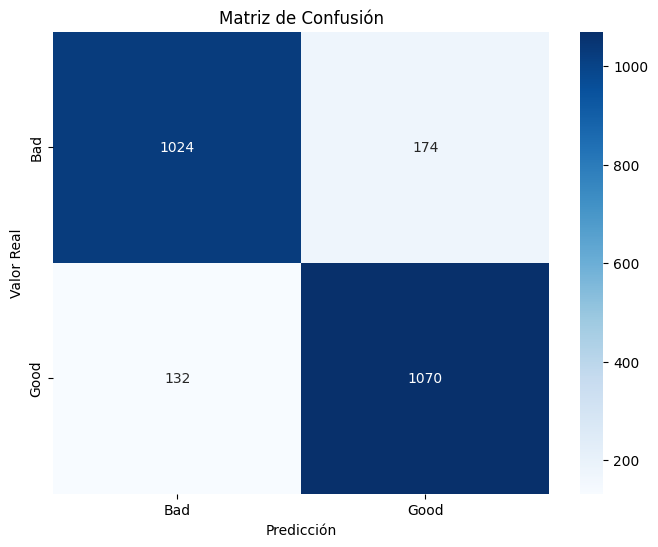

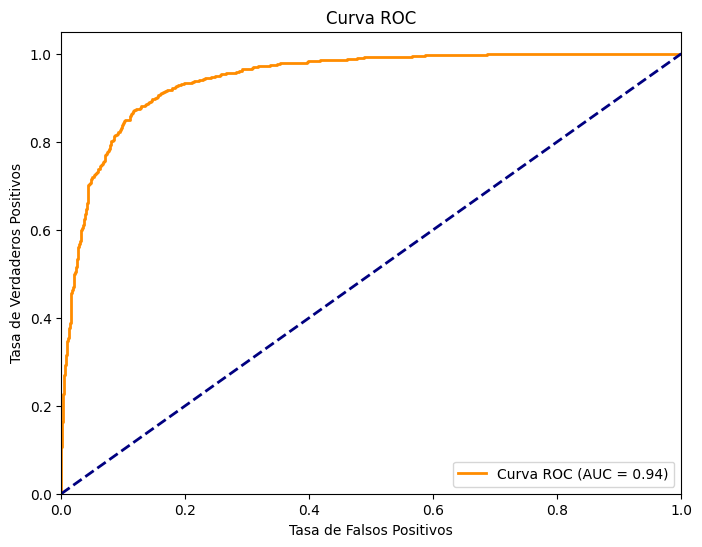

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc

# Visualizar la matriz de confusión como un heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Bad', 'Good'], yticklabels=['Bad', 'Good'])
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')
plt.show()

# Calcular la curva ROC y el AUC
y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Visualizar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

## Paso 13 (Opcional): Envío de Métricas por Correo

Como actividad adicional, prepara un código que genere un resumen con las 5 métricas principales (Accuracy, Precisión, Recall, F1-Score y AUC) y simula el envío de estas métricas por correo (puedes usar print o exportar a un archivo de texto como actividad de integración).

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def generate_metrics_report(y_true, y_pred, y_pred_proba):
  """
  Genera un resumen de las métricas de evaluación del modelo.

  Args:
    y_true: Valores verdaderos.
    y_pred: Predicciones del modelo.
    y_pred_proba: Probabilidades de predicción del modelo.

  Returns:
    Un string con el resumen de las métricas.
  """
  accuracy = accuracy_score(y_true, y_pred)
  precision = precision_score(y_true, y_pred)
  recall = recall_score(y_true, y_pred)
  f1 = f1_score(y_true, y_pred)
  auc = roc_auc_score(y_true, y_pred_proba)

  report = f"""
  Resumen de Métricas de Evaluación:

  Accuracy: {accuracy:.4f}
  Precisión: {precision:.4f}
  Recall: {recall:.4f}
  F1-Score: {f1:.4f}
  AUC: {auc:.4f}
  """
  return report

# Generar el reporte de métricas
metrics_report = generate_metrics_report(y_test, y_pred, y_pred_proba)

# Simular el envío por correo (usando print en este caso)
print("Simulando envío de métricas por correo:")
print(metrics_report)

# Opcional: Exportar a un archivo de texto
with open("metrics_report.txt", "w") as f:
  f.write(metrics_report)


Simulando envío de métricas por correo:

  Resumen de Métricas de Evaluación:

  Accuracy: 0.8725
  Precisión: 0.8601
  Recall: 0.8902
  F1-Score: 0.8749
  AUC: 0.9431
  


## Conclusiones

En este ejercicio se ha llevado a cabo un análisis completo sobre la calidad de las bananas. A partir de los distintos pasos realizados, se espera que los estudiantes sean capaces de:

- Explorar y entender la estructura del dataset.
- Preprocesar los datos, incluyendo la conversión de variables categóricas a numéricas.
- Validar el balance de clases en los conjuntos de entrenamiento y prueba.
- Entrenar un modelo de Regresión Logística.
- Evaluar el modelo usando diversas métricas (accuracy, matriz de confusión, reporte de clasificación y curva ROC AUC).

Finalmente, deben ser capaces de interpretar los resultados y extraer conclusiones sobre la capacidad del modelo para predecir la calidad de las bananas.